In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [13]:
def load_csv():
    """
    Carga el archivo CSV con los datos de rendimiento de los estudiantes.
    """
    path = 'TP1-2/src/dataset/Dry-Bean-Dataset.csv'
    if os.path.exists(path):
        dry_bean = pd.read_csv(path)
        return dry_bean
    else:
        return None
def info(df):
    """
    Describe el DataFrame y muestra información sobre los datos faltantes.
    """
    print(df.head())
    print(df.describe())
    print(df.info())
    print(f'Shape: {df.shape}')

    vacios_original=df.isna().sum()
    print(f"Datos vacíos:\n{vacios_original}")

In [2]:
def plot_variables(df):
    sns.set(style="darkgrid")

    # Obtiene una lista de todas las columnas numéricas del DataFrame
    numeric_columns = df.select_dtypes(include=[float, int]).columns

    # Calcula el número de filas y columnas necesarias para el ploteo
    num_rows = (len(numeric_columns) + 1) // 2
    num_cols = 2

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(2 * num_rows, 5 * num_cols))

    # Espacio entre los subplots
    plt.subplots_adjust(wspace=1, hspace=1)

    # Colores distintos para los histogramas
    colors = sns.color_palette("Set2", n_colors=len(numeric_columns))

    # Itera a través de las columnas numéricas y crea un histograma para cada una
    for i, col in enumerate(numeric_columns):
        row = i // num_cols
        col_idx = i % num_cols

        # Selecciona un color diferente para cada histograma
        color = colors[i]

        sns.histplot(data=df, x=col, kde=True, color=color, ax=axs[row, col_idx])

        axs[row, col_idx].set_xlabel(col, fontsize=10)
        axs[row, col_idx].set_ylabel("Count",fontsize=5)

        # Cambia el tamaño de letra de los ejes X y Y
        axs[row, col_idx].tick_params(axis='x', labelsize=5)
        axs[row, col_idx].tick_params(axis='y', labelsize=5)

    # Elimina cualquier subplot no utilizado
    for i in range(len(numeric_columns), num_rows * num_cols):
        row = i // num_cols
        col_idx = i % num_cols
        fig.delaxes(axs[row, col_idx])

    
    fig.suptitle(f"Histogramas de variales numéricas", fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el espacio para el título general
    plt.show()

In [3]:
def matriz_correlacion(df):
    corr = df.select_dtypes(include=[float, int]).corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(12, 7))

    ax = sns.heatmap(
        corr,
        #mask = mask,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        annot_kws={'size': 15},
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

    # Añade un título general a la figura

    ax.set_title("Matriz de Correlación", fontsize=12)
        
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el espacio para el título general
    plt.show()

In [4]:
def global_boxplots(df):
    # Asegúrate de que todas las columnas sean numéricas
    columnas_numericas = df.select_dtypes(include=['number'])
    
    if columnas_numericas.empty:
        print("No hay columnas numéricas en el DataFrame.")
        return
    
    # Normalizar las columnas numéricas
    scaler = StandardScaler()
    columnas_numericas_normalized = pd.DataFrame(scaler.fit_transform(columnas_numericas), columns=columnas_numericas.columns)
    
    # Crear una lista de títulos de columnas rotados
    column_titles = [col for col in columnas_numericas_normalized.columns]
    
    # Graficar los boxplots de las columnas numéricas normalizadas con rango en el eje Y de -4 a 4
    plt.figure(figsize=(20, 10))
    plt.title("Boxplots para todas las variables")
    boxplot = plt.boxplot(columnas_numericas_normalized.values, vert=True)
    
    # Rotar los títulos de las columnas
    plt.xticks(range(1, len(columnas_numericas_normalized.columns) + 1), column_titles, rotation=90)
    
    plt.xlabel("Variables")
    plt.ylabel("Valores Normalizados")
    plt.ylim(-4, 4)  # Establecer el rango en el eje Y
    plt.show()

In [17]:
def scatter_plot(df):
    numeric_cols = df.select_dtypes(include=['number'])
    num_plots = len(numeric_cols.columns)
    
    # Determina el número de filas y columnas para la matriz
    num_rows = (num_plots + 2) // 3  # Redondea hacia arriba
    num_cols = min(num_plots, 3)

    # Aumenta el tamaño de la figura
    figsize = (10, num_rows * 3)  # Aumenta la altura de la figura
    
    # Crea una figura de Matplotlib con subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, col in enumerate(numeric_cols.columns):
        row = i // num_cols
        col_num = i % num_cols  # Cambia el nombre de la variable para evitar la confusión

        # Selecciona el subplot actual
        ax = axes[row, col_num]

        # Crea el gráfico de dispersión en el subplot
        sns.scatterplot(x=col, y='Area', data=df, ax=ax)
        ax.set_title(col)  # Configura el título del subplot

    # Elimina subplots no utilizados
    for i in range(num_plots, num_rows * num_cols):
        row = i // num_cols
        col_num = i % num_cols
        fig.delaxes(axes[row, col_num])

    plt.tight_layout()
    plt.show()


In [6]:
def check_balance(df):
    """
    Calcula el balance de clases para las columnas objetivo en un DataFrame.
    """
    # Graficar el balance de las clases
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='Class', order=df['Class'].value_counts().index)
    plt.title('Balance de las clases en todo el conjunto de datos')
    plt.xlabel('Clase')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.show()

def graficos(df):
    """
    Graficos de variables numéricas y matriz de correlación
    """
    # Imprimir la cantidad de datos disponibles
    print(f"Cantidad de datos disponibles en el DataFrame: {len(df)}")
    plot_variables(df)
    matriz_correlacion(df)
    global_boxplots(df)
    scatter_plot(df)
    check_balance(df)

    Area  Perimeter  MajorAxisLength  MinorAxisLength  Eccentricity  \
0  28395    610.291       208.178117       173.888747      0.549812   
1  28734    638.018       200.524796       182.734419      0.411785   
2  29380    624.110       212.826130       175.931143      0.562727   
3  30008    645.884       210.557999       182.516516      0.498616   
4  30140    620.134       201.847882       190.279279      0.333680   

   ConvexArea  EquivDiameter    Extent  Solidity  Compactness  ShapeFactor1  \
0       28715     190.141097  0.763923  0.988856     0.913358      0.007332   
1       29172     191.272750  0.783968  0.984986     0.953861      0.006979   
2       29690     193.410904  0.778113  0.989559     0.908774      0.007244   
3       30724     195.467062  0.782681  0.976696     0.928329      0.007017   
4       30417     195.896503  0.773098  0.990893     0.970516      0.006697   

   ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0      0.003147      0.834222      0.998724  

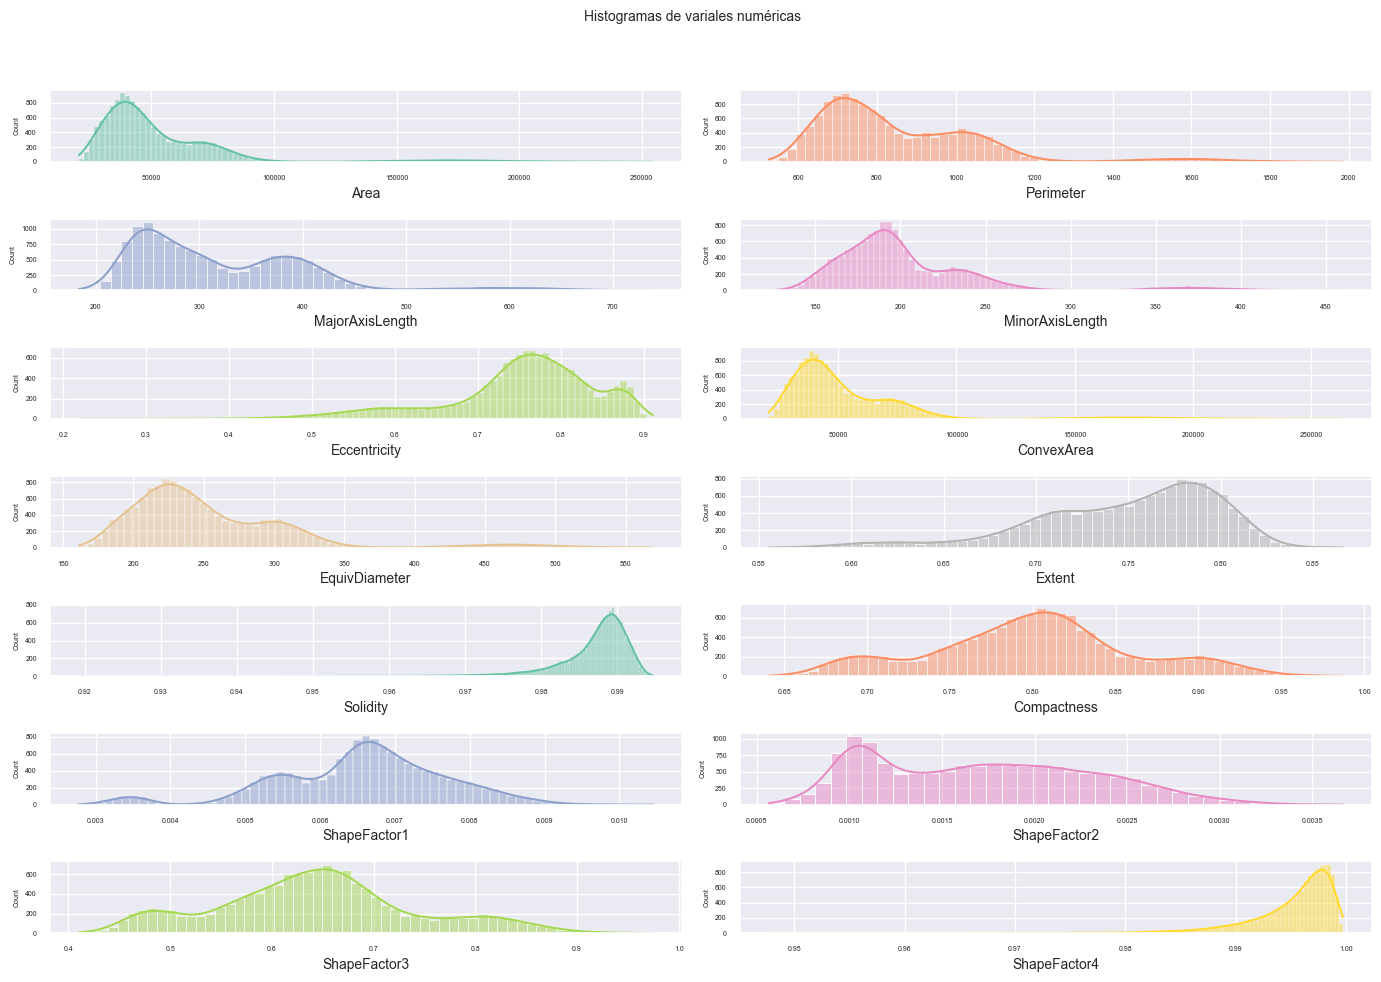

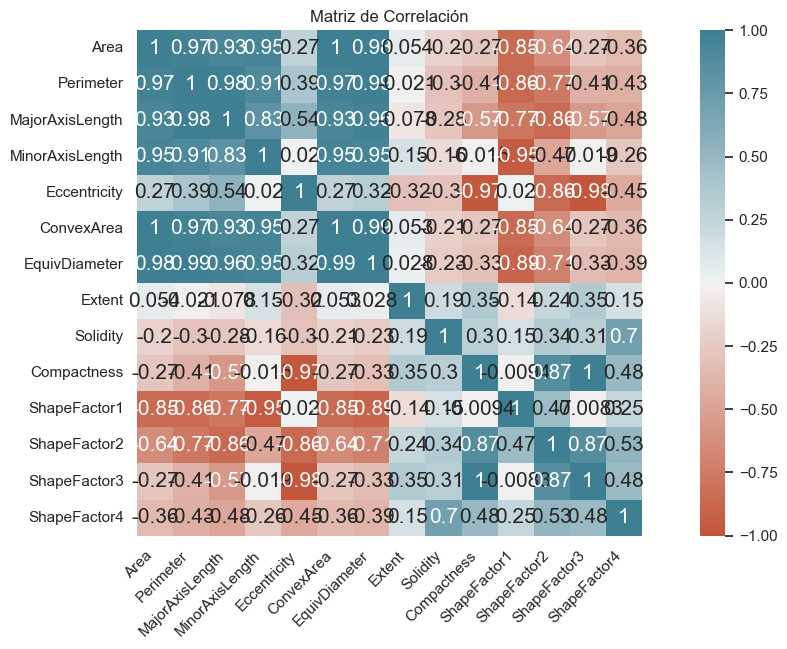

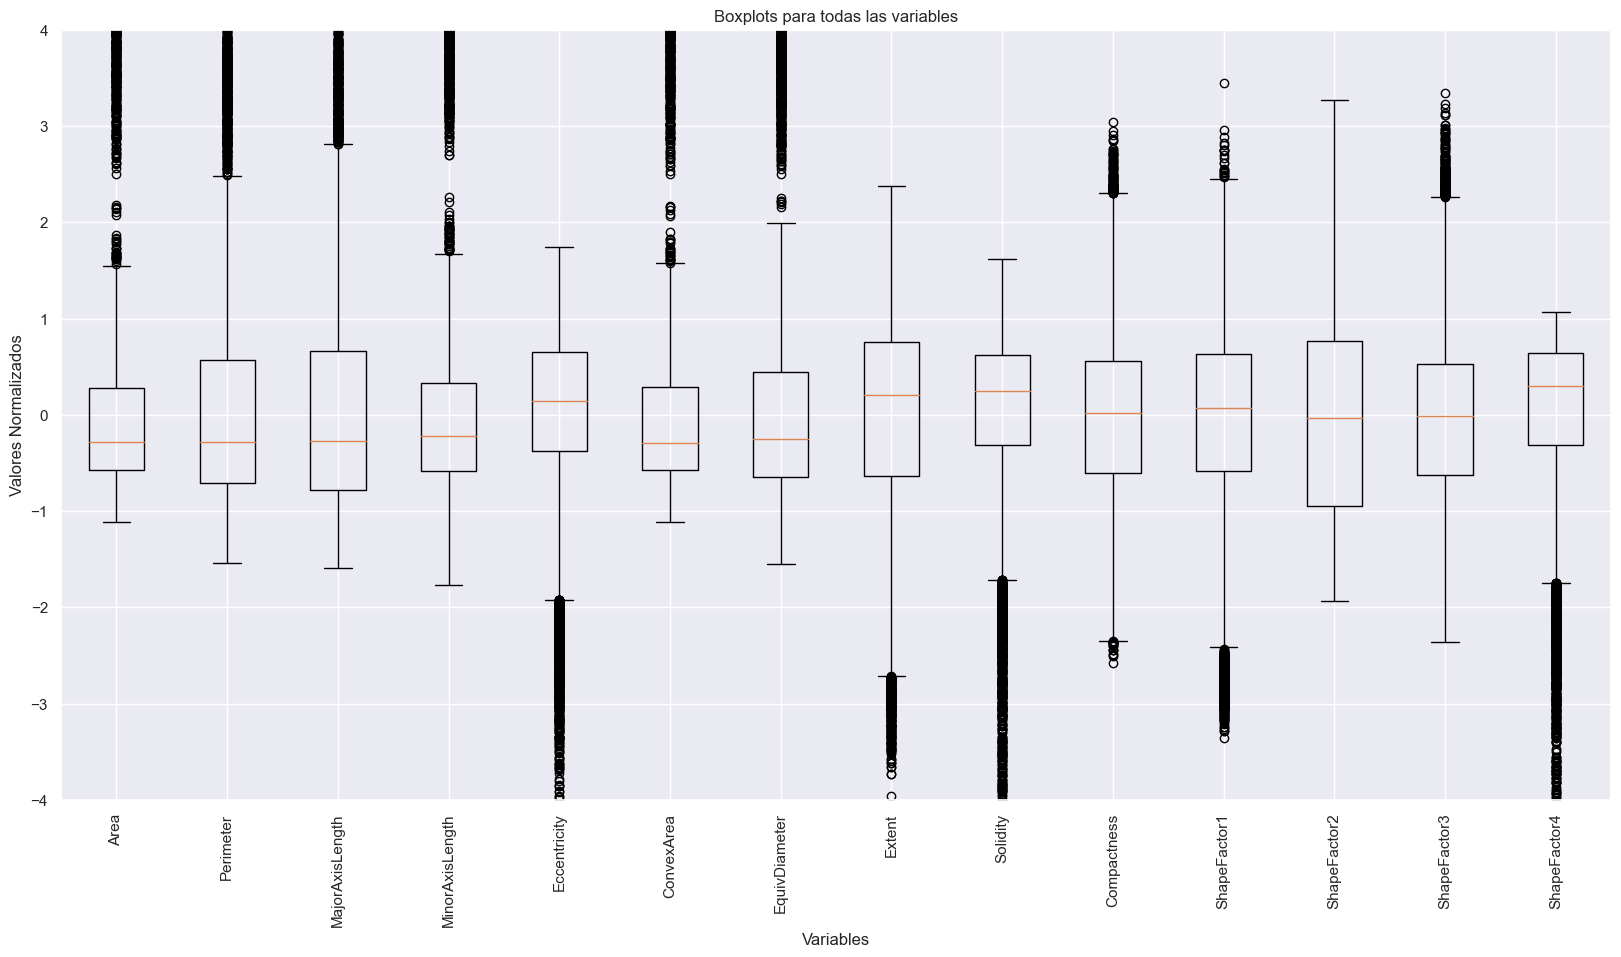

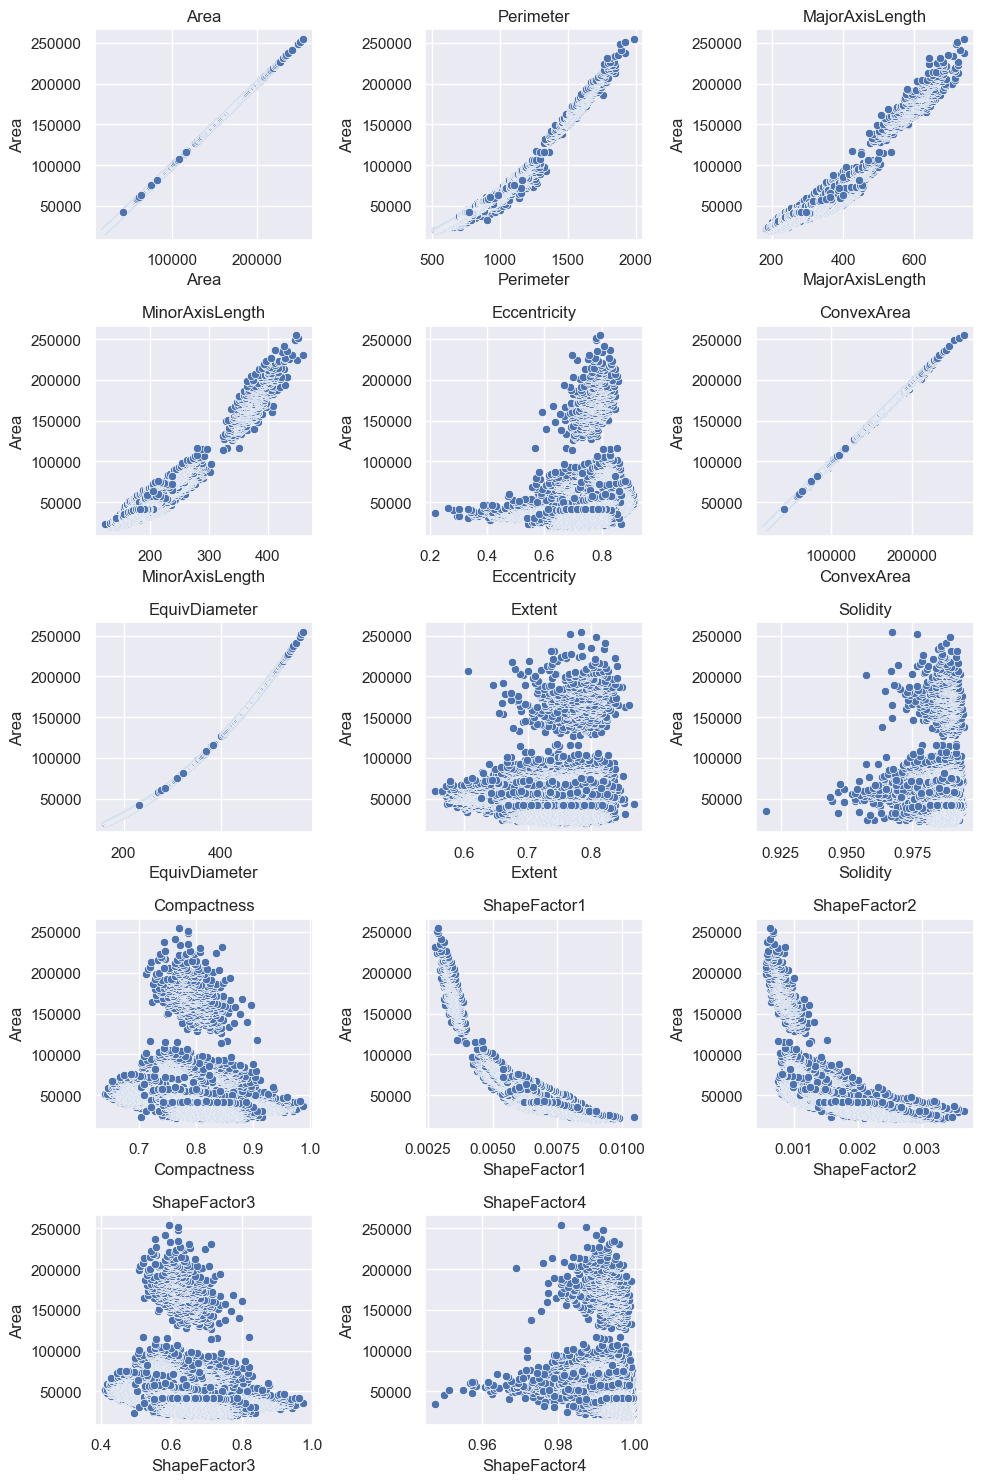

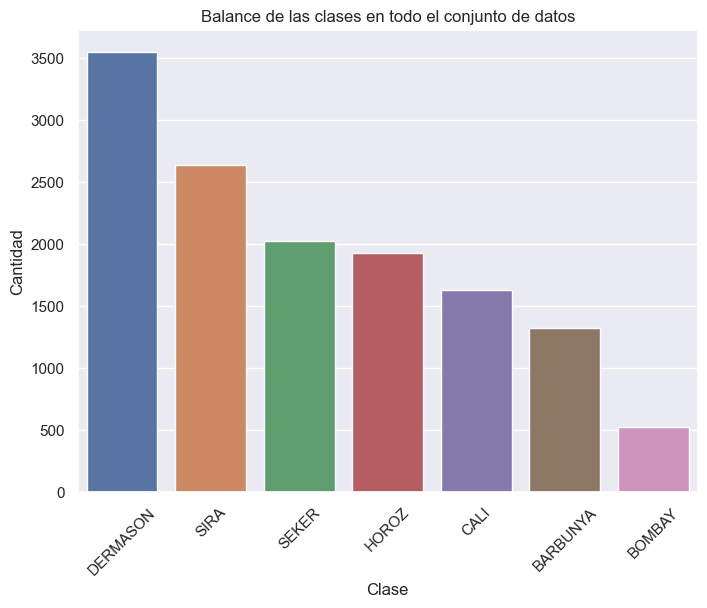

In [18]:
info(load_csv())
graficos(load_csv())